# Heart Valve Sound Isolation and Noise Reduction

In this notebook, we will process an audio file to isolate clicking sounds and reduce background noise. The steps include applying a high-pass filter, detecting transient clicks, and performing noise reduction using spectral gating.

---

## Step 1: Import Required Libraries

In this step, we import the necessary libraries: `librosa` for audio processing, `scipy` for filtering, `soundfile` for saving the audio, and `matplotlib` for visualization.


In [17]:
# Step 1: Import Required Libraries
import os
import numpy as np
import librosa
import librosa.display
import scipy.signal
import soundfile as sf
import matplotlib.pyplot as plt
import noisereduce as nr

# Configure matplotlib to display plots inline in the notebook
%matplotlib inline


## Step 2: Load the Audio File



In [18]:
# Step 2: Load the Audio File
input_file_path = 'C:/Users/dasar/OneDrive/Desktop/Programing/Heart Valve Sound Analysis/audio_files/unprocessed_audio/MarioHeart1.wav'
output_directory = 'C:/Users/dasar/OneDrive/Desktop/Programing/Heart Valve Sound Analysis/audio_files/processed_audio'

# Extract the file name
input_file_name = os.path.splitext(os.path.basename(input_file_path))[0]

# Define the output path by appending "_cleaned" to the file name
output_file_name = f"{input_file_name}_cleanedv2.wav"
output_file_path = os.path.join(output_directory, output_file_name)

# Ensure the output directory exists
os.makedirs(output_directory, exist_ok=True)

# Load the audio file
audio_data, sample_rate = librosa.load(input_file_path, sr=None)

# Display basic information about the audio
print(f"Sample rate: {sample_rate} Hz")
print(f"Audio duration: {librosa.get_duration(y=audio_data, sr=sample_rate):.2f} seconds")


Sample rate: 48000 Hz
Audio duration: 63.08 seconds


# Step 3: Apply Frequency Filtering


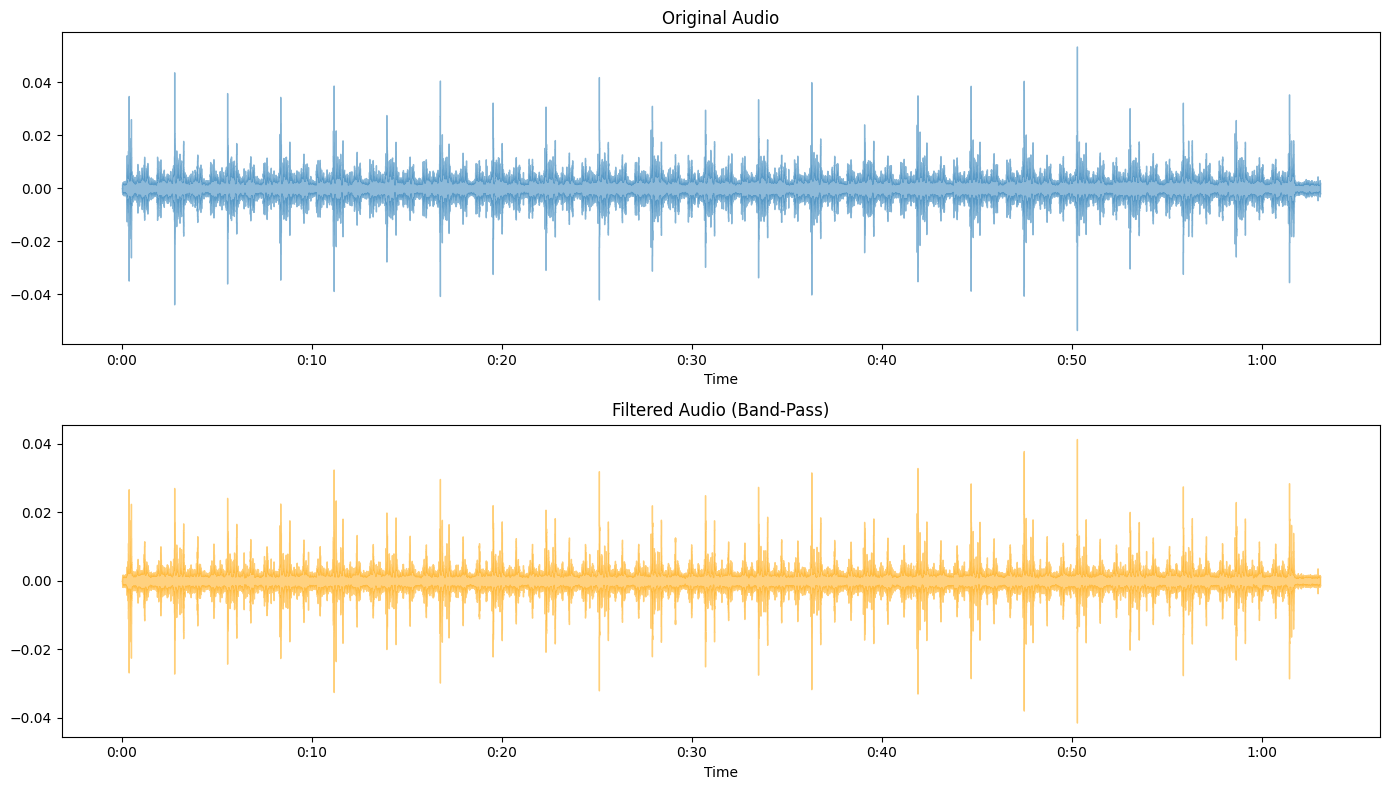

In [19]:
# Step 3: Apply Frequency Filtering
def band_pass_filter(audio_data, sample_rate, lowcut=500, highcut=5000, order=6):
    nyquist = 0.5 * sample_rate
    low = lowcut / nyquist
    high = highcut / nyquist
    sos = scipy.signal.butter(order, [low, high], btype='band', output='sos')
    filtered_audio = scipy.signal.sosfilt(sos, audio_data)
    return filtered_audio

# Apply band-pass filter to isolate frequencies of heart valve clicks
filtered_audio = band_pass_filter(audio_data, sample_rate, lowcut=500, highcut=5000)

# Plot the original and filtered audio
plt.figure(figsize=(14, 8))

plt.subplot(2, 1, 1)
librosa.display.waveshow(audio_data, sr=sample_rate, alpha=0.5)
plt.title('Original Audio')

plt.subplot(2, 1, 2)
librosa.display.waveshow(filtered_audio, sr=sample_rate, color='orange', alpha=0.5)
plt.title('Filtered Audio (Band-Pass)')

plt.tight_layout()
plt.show()


# Step 4: Noise Reduction with Advanced Techniques

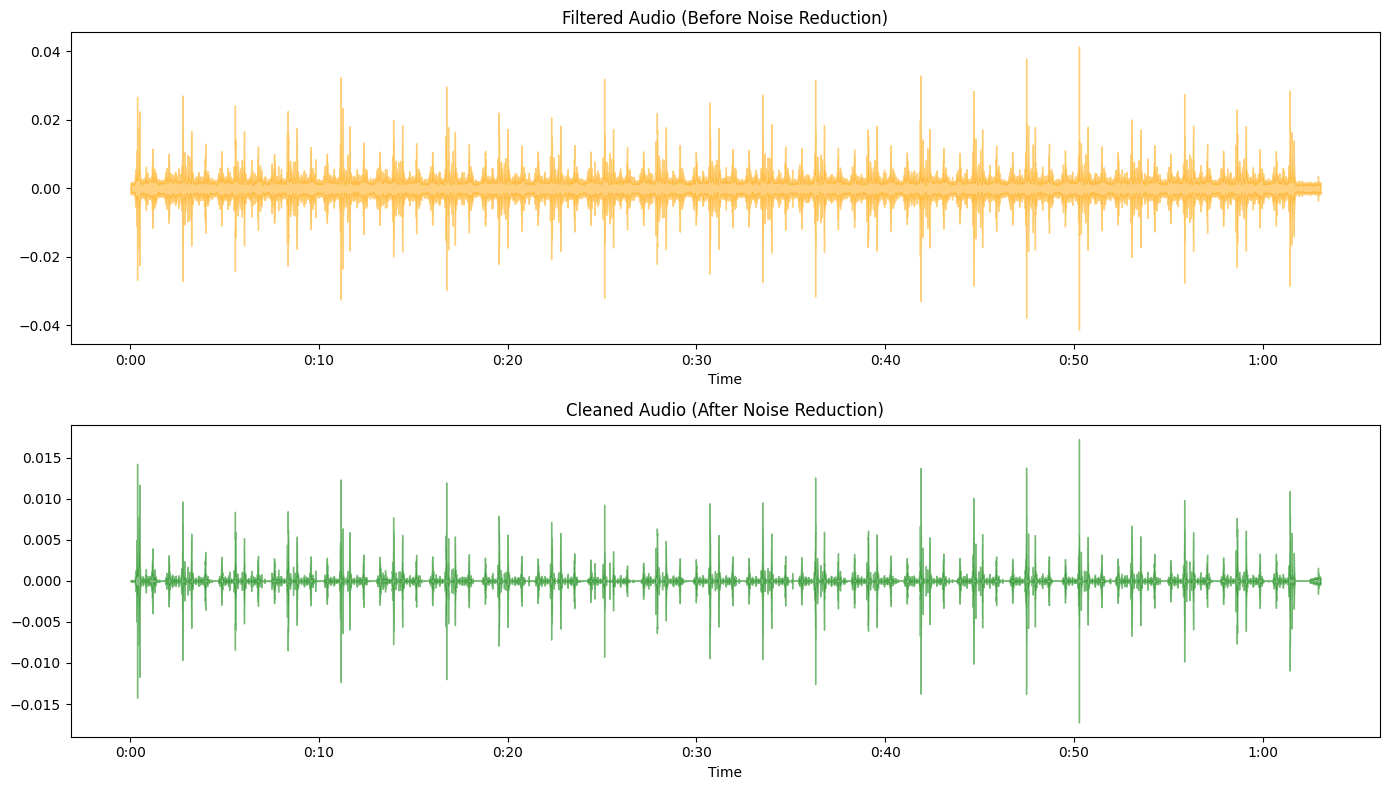

In [20]:
# Step 4: Noise Reduction with Advanced Techniques
# Extract a noise profile from a segment without clicks
# Assuming the first second contains mainly noise
noise_sample = filtered_audio[:sample_rate]

# Apply noise reduction
cleaned_audio = nr.reduce_noise(y=filtered_audio, y_noise=noise_sample, sr=sample_rate, prop_decrease=1.0)

# Plot the filtered and cleaned audio
plt.figure(figsize=(14, 8))

plt.subplot(2, 1, 1)
librosa.display.waveshow(filtered_audio, sr=sample_rate, color='orange', alpha=0.5)
plt.title('Filtered Audio (Before Noise Reduction)')

plt.subplot(2, 1, 2)
librosa.display.waveshow(cleaned_audio, sr=sample_rate, color='green', alpha=0.5)
plt.title('Cleaned Audio (After Noise Reduction)')

plt.tight_layout()
plt.show()


# Step 5: Transient Detection (Heart Valve Click Detection)



Number of detected clicks: 52


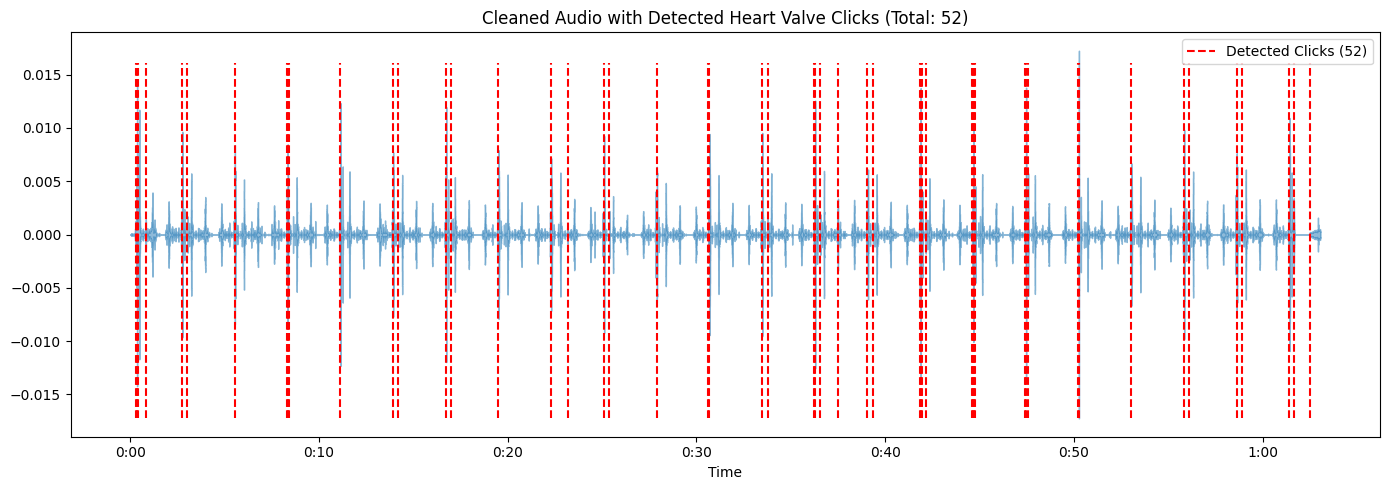

In [21]:
# Step 5: Transient Detection (Heart Valve Clicks)
# Use a higher threshold for onset detection due to sharp clicks
onset_env = librosa.onset.onset_strength(y=cleaned_audio, sr=sample_rate)
onset_frames = librosa.onset.onset_detect(onset_envelope=onset_env, sr=sample_rate, backtrack=True, delta=0.3)
onset_times = librosa.frames_to_time(onset_frames, sr=sample_rate)

# Display the number of clicks
num_clicks = len(onset_times)
print(f"Number of detected clicks: {num_clicks}")

# Plot the cleaned audio with detected clicks
plt.figure(figsize=(14, 5))
librosa.display.waveshow(cleaned_audio, sr=sample_rate, alpha=0.5)
plt.vlines(onset_times, ymin=cleaned_audio.min(), ymax=cleaned_audio.max(), color='r', linestyle='--', label=f'Detected Clicks ({num_clicks})')
plt.title(f'Cleaned Audio with Detected Heart Valve Clicks (Total: {num_clicks})')
plt.legend()
plt.tight_layout()
plt.show()


# Step 6: Save the Cleaned Audio


In [22]:
# Step 6: Save Cleaned Audio
sf.write(output_file_path, cleaned_audio, sample_rate)
print(f"Cleaned audio saved at: {output_file_path}")


Cleaned audio saved at: C:/Users/dasar/OneDrive/Desktop/Programing/Heart Valve Sound Analysis/audio_files/processed_audio\MarioHeart1_cleanedv2.wav
